****Research Question****

Research Question: What is the relationship between comments and rating in kdrama and jdrama reviews?

****Data Collection and Cleaning****

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import time

In [2]:
req = requests.get("http://asianwiki.com/Main_Page")
soup = BeautifulSoup(req.content, "html.parser")
tag_list = soup.findAll("div", {"id": "slider"})[1].findAll("a")
urls = []
for tag in tag_list:
    urls.append(tag["href"])
urls

['http://asianwiki.com/A_Little_Room_For_Hope',
 'http://asianwiki.com/Manager_Rinko_Kazehana%27s_Love',
 'http://asianwiki.com/Mr._Sunshine',
 'http://asianwiki.com/Your_House_Helper',
 'http://asianwiki.com/Absolute_Zero_3',
 'http://asianwiki.com/Born_to_be_a_Flower',
 'http://asianwiki.com/CSI:_Crime_Scene_Talks_Season_5',
 'http://asianwiki.com/Giver:_Revenge%27s_Giver',
 'http://asianwiki.com/Good_Doctor_(Japanese_Drama)',
 'http://asianwiki.com/Investor_Z',
 'http://asianwiki.com/Let_Me_Introduce_Her',
 'http://asianwiki.com/Seven_Detectives:_Season_4',
 'http://asianwiki.com/Stepmom_and_Daughter_Blues',
 'http://asianwiki.com/Survival_Wedding',
 'http://asianwiki.com/To._Jenny',
 'http://asianwiki.com/We_Are_Rockets',
 'http://asianwiki.com/Caseworker%27s_Diary',
 'http://asianwiki.com/The_Detective_is_Way_Ahead',
 'http://asianwiki.com/Hagetaka_(Japanese_Drama)',
 'http://asianwiki.com/In_This_Corner_of_the_World',
 'http://asianwiki.com/An_Invisible_Cradle',
 'http://asianwik

In [3]:
data = []
additional_columns = ["Network", "Episodes", "Country", "Language", "Title"]
for url in urls:
    #Bug in website
    if url == urls[117]:
        url = url[:len(urls[117]) - 1]
    
    kdrama = {"Network": "", 
            "Episodes": -1,
            "Country": "", 
            "Language": "", 
             "Title" : ""}
    req = requests.get(url)
    soup  = BeautifulSoup(req.content, "html.parser")
    content = soup.find("div", {"id":"mw-content-text"})

    #Rating
    rating_content = content.findAll("b")
    try:
        kdrama["rating"] = float(rating_content[0].text.split("/")[0].rstrip().lstrip())
    except (ValueError, IndexError) as e:
        kdrama["rating"] = float('NaN')

    #Comments
    comments = []
    comments_char_len = 0
    comments_word_len = 0
    for div in content.findAll("div", {"class":"comment-item"}):
        comment = div.text.replace('\xa0', "").split('\n')[2]
        comments.append(comment)
        comments_char_len += len(comment)
        comments_word_len += len(comment.split(" "))
    kdrama["comments"] = " ".join(comments)
    kdrama["no_comments"] = len(comments)
    if len(comments) != 0:
        kdrama["avg_comment_char_len"] = comments_char_len / len(comments)
        kdrama["avg_comment_word_len"] = comments_word_len / len(comments)
    else:
        kdrama["avg_comment_char_len"] = 0
        kdrama["avg_comment_word_len"] = 0
    #Title
    titles = soup.findAll("h1")
    if len(titles) >= 1:
        kdrama["Title"] = titles[0].get_text()
    
    #Network, Country, Language, Episodes
    for ils in soup.findAll("li"):
        text = ils.get_text()
        components = text.split(":")
        if components[0].strip() in additional_columns: 
            kdrama[components[0].strip()] = components[1].strip()
    
    data.append(kdrama)
    time.sleep(0.25)
data

[{'Network': 'TV Asahi, ABC',
  'Episodes': '10',
  'Country': 'Japan',
  'Language': 'Japanese',
  'Title': 'A Little Room For Hope',
  'rating': 90.0,
  'comments': "interesting to watch...love the plot and only the manga can do. im looking forward for a happy ending though T_T Their relationship is pretty f*ckd up but it's interesting to watch I read the manga and I love this heartwarming but sad in the same time story I hope the live action is doing well as the manga",
  'no_comments': 3,
  'avg_comment_char_len': 101.66666666666667,
  'avg_comment_word_len': 19.333333333333332},
 {'Network': 'NTV, YTV',
  'Episodes': '2',
  'Country': 'Japan',
  'Language': 'Japanese',
  'Title': "Manager Rinko Kazehana's Love",
  'rating': 43.0,
  'comments': '',
  'no_comments': 0,
  'avg_comment_char_len': 0,
  'avg_comment_word_len': 0},
 {'Network': 'tvN',
  'Episodes': '24',
  'Country': 'South Korea',
  'Language': 'Korean',
  'Title': 'Mr. Sunshine',
  'rating': 85.0,
  'comments': 'i thin

In [4]:
drama_df = pd.DataFrame(data)
comments_df = drama_df[["comments",
     "avg_comment_char_len",
     "avg_comment_word_len",
     "no_comments",
     "rating"]].dropna()
drama_df.head()

,Country,Episodes,Language,Network,Title,avg_comment_char_len,avg_comment_word_len,comments,no_comments,rating
0,Japan,10,Japanese,"TV Asahi, ABC",A Little Room For Hope,101.666667,19.333333,interesting to watch...love the plot and only ...,3,90.0
1,Japan,2,Japanese,"NTV, YTV",Manager Rinko Kazehana's Love,0.000000,0.000000,,0,43.0
2,South Korea,24,Korean,tvN,Mr. Sunshine,168.599688,31.205607,i think at that time US had skin color racist ...,642,85.0
3,South Korea,32,Korean,KBS2,Your House Helper,180.960396,33.158416,This has to be my favorite role that Ha Seok-J...,101,86.0
4,Japan,10,Japanese,Fuji TV,Absolute Zero 3,167.000000,30.000000,Well i hope this drama will continue for new s...,1,84.0


***Data Visualization***

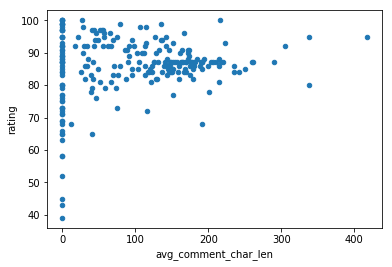

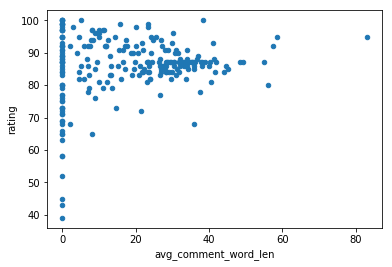

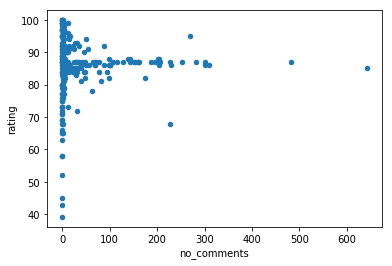

In [5]:
#Plot number of comments to ranking
%matplotlib inline
comments_df.plot.scatter(x="avg_comment_char_len", y="rating")
comments_df.plot.scatter(x="avg_comment_word_len", y="rating")
comments_df.plot.scatter(x="no_comments", y="rating")

In [6]:
drama_df[["Language", "rating"]].groupby("Language").rating.mean()

Language
Japanese    85.820144
Korean      86.090000
Name: rating, dtype: float64

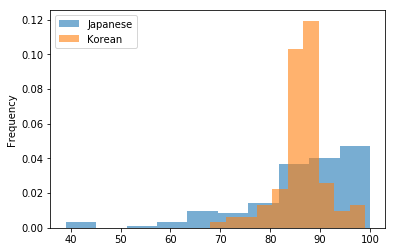

In [7]:
for each in drama_df[["Language", "rating"]].groupby("Language").Language:
    (drama_df[drama_df.Language == each[0]]["rating"]
     .plot.hist(legend=True, label=each[0], alpha=0.6, density=True))

****Machine Learning****

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

In [9]:
def k_mean_hypertune(k):
    x_train = drama_df["comments"].dropna()
    y_train = drama_df["rating"].loc[x_train.index].dropna()
    x_train = drama_df["comments"].loc[y_train.index]
    vec = TfidfVectorizer(max_features=100)
    vec.fit(x_train)
    x_train = vec.transform(x_train)
    pipeline = Pipeline([
        ("model", KNeighborsRegressor(n_neighbors=int(round(k))))
    ])
    
    score = cross_val_score(pipeline, x_train, y_train, 
                    cv=10, scoring="neg_mean_squared_error")
    return np.sqrt(-score.mean())

#Generic Series Creator
def set_series(start, end, increment=1, type="int"):
    temp = list(range(start, end, increment))
    series = pd.Series(temp)
    series = series.reindex(temp)
    for x in temp:
        series[x] = x
    
    if type is "int":
        return series.astype(int)
    else:
        return series

In [10]:
k_series = set_series(1, 100, type=float)
k_series = k_series.apply(k_mean_hypertune)

(83, 9.595714235888018)

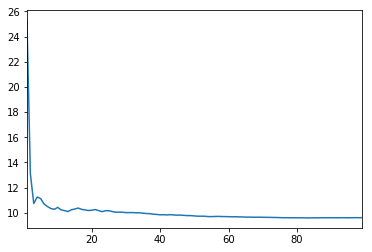

In [11]:
#plt.title("K Hyperparamter Tuning")
#plt.xlabel("K")
#plt.ylabel("RMSE")
k_series.plot.line()
k_val = k_series.idxmin()
(k_series.idxmin(), k_series.min())

In [12]:
def tfidfvec_tuning(k):
    x_train = drama_df["comments"].dropna()
    y_train = drama_df["rating"].loc[x_train.index].dropna()
    x_train = drama_df["comments"].loc[y_train.index]
    vec = TfidfVectorizer(max_features=int(k))
    vec.fit(x_train)
    x_train = vec.transform(x_train)
    pipeline = Pipeline([
        ("model", KNeighborsRegressor(n_neighbors=k_val))
    ])
    
    score = cross_val_score(pipeline, x_train, y_train, 
                    cv=10, scoring="neg_mean_squared_error")
    return np.sqrt(-score.mean())


(62, 9.554384212565859)

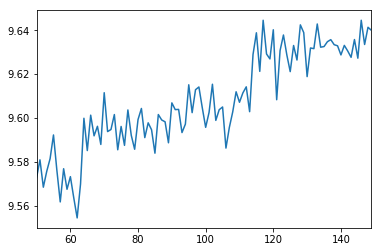

In [13]:
max_f = set_series(50, 150, type="float")
max_f = max_f.apply(tfidfvec_tuning)
max_f.plot.line()
max_f_val = max_f.idxmin()
(max_f.idxmin(), max_f.min())

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor

#Generic Pipe and Train for future models for comments
def pipe_and_train(pipeline):
    x_train = drama_df["comments"].dropna()
    y_train = drama_df["rating"].loc[x_train.index].dropna()
    x_train = drama_df["comments"].loc[y_train.index]

    vec = TfidfVectorizer(max_features=max_f_val)
    vec.fit(x_train)
    x_train = vec.transform(x_train).todense()

    scores = cross_val_score(pipeline, x_train, y_train, 
                             cv=10, scoring="neg_mean_squared_error")
    return np.sqrt(np.mean(-scores))

def try_gpr_alpha(k):
    return (pipe_and_train( 
        GaussianProcessRegressor(alpha=k)))

(0.1, 11.518204855486072)

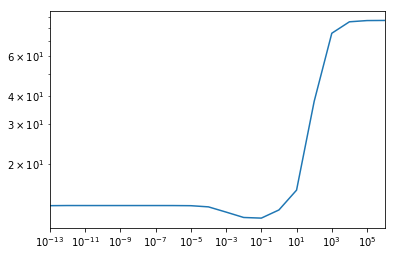

In [15]:
temp = list(range(0,20))
for x in temp:
    temp[x] = 1e-13 * (10 ** x)


gpr_alpha_series = pd.Series(temp)
gpr_alpha_series = gpr_alpha_series.reindex(temp)
for x in temp:
    gpr_alpha_series[x] = x
    
gpr_alpha_series = gpr_alpha_series.apply(try_gpr_alpha)
plt.xscale("log")
plt.yscale("log")
gpr_alpha_series.plot.line()
(gpr_alpha_series.idxmin(), gpr_alpha_series.min())

(0.047, 11.478899797462065)

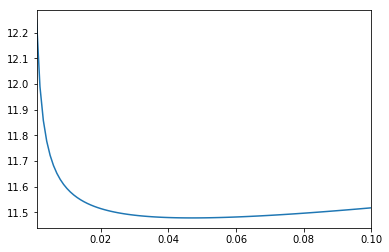

In [16]:
temp = list(range(1, 101))
i = 0
for x in temp:
    temp[i] = round(x * 0.001, 3)
    i += 1
gpr_alpha_series2 = pd.Series()
gpr_alpha_series2 = gpr_alpha_series2.reindex(temp)
for x in temp:
    gpr_alpha_series2[x] = x

gpr_alpha_series2 = gpr_alpha_series2.apply(try_gpr_alpha)
gpr_alpha_series2.plot.line()
gpr_alpha = gpr_alpha_series2.idxmin()
(gpr_alpha_series2.idxmin(), gpr_alpha_series2.min())

(200, 37.17616833738098)

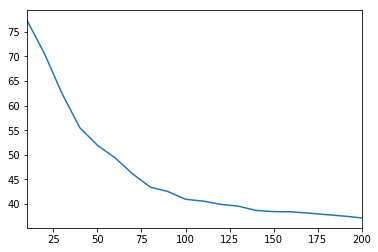

In [17]:
from sklearn.neural_network import MLPRegressor

def mlp_first_layer_tuning(k):
    return (pipe_and_train(
        MLPRegressor(
            hidden_layer_sizes=(int(round(k)),))))

import warnings
warnings.filterwarnings("ignore")

mlp_layer1_series = set_series(10, 201, 10, type="float")
mlp_layer1_series = mlp_layer1_series.apply(mlp_first_layer_tuning)
mlp_layer1_series.plot.line()
layer1 = mlp_layer1_series.idxmin()
(mlp_layer1_series.idxmin(), mlp_layer1_series.min())

(200, 9.978469094313828)

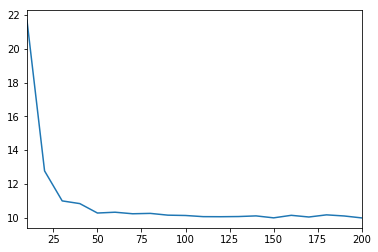

In [18]:
def mlp_second_layer_tuning(k):
    return (pipe_and_train(
        MLPRegressor(
            hidden_layer_sizes=(layer1, int(round(k)),))))

mlp_layer2_series = set_series(10, 201, 10, type="float")
mlp_layer2_series = mlp_layer2_series.apply(mlp_second_layer_tuning)
mlp_layer2_series.plot.line()
layer2 = mlp_layer2_series.idxmin()
(mlp_layer2_series.idxmin(), mlp_layer2_series.min())

(200, 9.545820684768335)

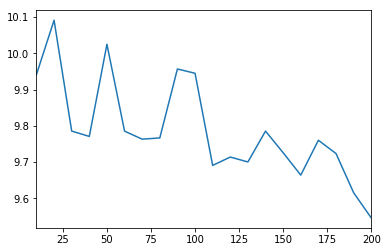

In [19]:
def mlp_third_layer_tuning(k):
    return (pipe_and_train(
        MLPRegressor(
            hidden_layer_sizes=(layer1, layer2, int(round(k)),))))

mlp_layer3_series = set_series(10, 201, 10, type="float")
mlp_layer3_series = mlp_layer3_series.apply(mlp_third_layer_tuning)
mlp_layer3_series.plot.line()
layer3 = mlp_layer3_series.idxmin()
(mlp_layer3_series.idxmin(), mlp_layer3_series.min())

(1600, 9.557773610334399)

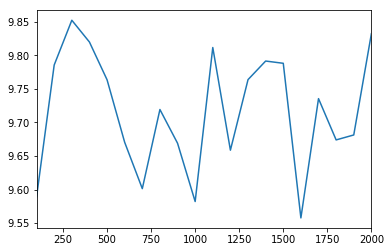

In [20]:
def mlp_iteration_tuning(k):
    return (pipe_and_train(
        MLPRegressor(
            hidden_layer_sizes=(layer1, layer2, layer3,),
            max_iter=int(round(k)))))

mlp_iter_series = set_series(100, 2001, 100, type="float")
mlp_iter_series = mlp_iter_series.apply(mlp_iteration_tuning)
mlp_iter_series.plot.line()
mlp_iter = mlp_iter_series.idxmin()
(mlp_iter_series.idxmin(), mlp_iter_series.min())

Ensemble

In [21]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.linear_model import LinearRegression

class RegressionEnsembler(BaseEstimator, RegressorMixin):
    """Creates an ensemble model out of a collection of individual estimators
    
    Args:
      estimators: A list containing the individual estimators.
      learn_weights: A boolean that specifies whether we should learn the
        "optimal" weights/coefficients to apply to each individual estimator's
        predictions. If False, we simply return the straight average of the 
        individual estimators' predictions as the ensemble prediction.
    """
    
    def __init__(self, estimators, learn_weights=True):
        self.estimators = estimators
        self.learn_weights = learn_weights
        
    def fit(self, X, y):
        # check that X and y have the correct shape
        X, y = check_X_y(X, y)
        
        # store the training features and the labels
        self.X_ = X
        self.y_ = y
        
        # call the fit method of each of the estimators
        for estimator in self.estimators:
            estimator.fit(X, y)
            
        # if we wish to learn the "optimal" weights from the training data
        if self.learn_weights:
            # get prediction from each estimator on the training data
            predictions = []
            for estimator in self.estimators:
                predictions.append(estimator.predict(X))
            Y_ = np.column_stack(predictions)
        
            # fit linear regression on top of the estimators' predictions
            self.ensembler = LinearRegression(fit_intercept=False)
            self.ensembler.fit(Y_, y)
            
        return self
    
    def predict(self, X):
        # check that fit has been called
        check_is_fitted(self, ['X_', 'y_'])
        
        # check that X has the right form
        X = check_array(X)
        
        # calculate predictions from the estimators
        predictions = []
        for estimator in self.estimators:
            predictions.append(estimator.predict(X))
        Y_ = np.column_stack(predictions)
        
        # return predictions
        if self.learn_weights:
            return self.ensembler.predict(Y_)
        else:
            return Y_.mean(axis=1)

In [22]:
ensemble_model = RegressionEnsembler([model1, model2])

X_train = drama_df["comments"].dropna()
Y_train = drama_df["rating"].loc[X_train.index].dropna()
X_train = drama_df["comments"].loc[Y_train.index]
vec = TfidfVectorizer(max_features=100)
vec.fit(X_train)
X_train = vec.transform(X_train).todense()

NameError: name 'model1' is not defined

In [ ]:
def test_ensembles(model1, model2, X_train, Y_train):
    return (np.sqrt(-cross_val_score(model1, X_train, Y_train,
                     cv=20, scoring="neg_mean_squared_error").mean()),
    np.sqrt(-cross_val_score(model2, X_train, Y_train,
                     cv=20, scoring="neg_mean_squared_error").mean()),
    np.sqrt(-cross_val_score(RegressionEnsembler([model1, model2], learn_weights=True), X_train, Y_train,
                     cv=20, scoring="neg_mean_squared_error").mean()),
    np.sqrt(-cross_val_score(RegressionEnsembler([model1, model2], learn_weights=False), X_train, Y_train,
                     cv=20, scoring="neg_mean_squared_error").mean())
    )

In [ ]:
#Best two models (MLP Regressor + K-Nearest Neighbors)
model1 = KNeighborsRegressor(n_neighbors=k_val)
model2 = MLPRegressor(
            hidden_layer_sizes=(layer1, layer2, layer3,),
            max_iter=mlp_iter)

test_ensembles(model1, model2, X_train, Y_train)

In [ ]:
#Try adding GPR
ensemble_model = RegressionEnsembler([model1, model2], learn_weights=False)
gprmodel = GaussianProcessRegressor(alpha=gpr_alpha)

test_ensembles(ensemble_model, gprmodel, X_train, Y_train)

In [ ]:
def pipe_and_train_num(model):
    y_train = drama_df[["rating"]].dropna()
    x_train = drama_df[[
         "avg_comment_char_len",
         "avg_comment_word_len",
         "no_comments"]].loc[y_train.index]
    pipeline = Pipeline([
        ("st", StandardScaler()), 
        ("model", model)
    ])
    scores = cross_val_score(pipeline, x_train, y_train, 
                             cv=10, scoring="neg_mean_squared_error")
    return np.sqrt(np.mean(-scores))

In [ ]:
k2_series = set_series(1, 100, type=float)
k2_series = k2_series.apply(lambda x: pipe_and_train_num(KNeighborsRegressor(n_neighbors=int(round(x)))))
k2_series.plot.line()
k2_val = k_series.idxmin()
plt.title("KMeans on Numerical Comment Data")
plt.xlabel("K")
plt.ylabel("RMSE")
(k2_series.idxmin(), k2_series.min())

In [ ]:
mlp2_layer1_series = set_series(10, 201, 10, type="float")
mlp2_layer1_series = mlp2_layer1_series.apply(lambda x: pipe_and_train_num(MLPRegressor(
                                            hidden_layer_sizes=(int(round(x)),))))
plt.title("MLP Regressor(First Layer) on Numerical Comment Data")
plt.xlabel("# Nodes")
plt.ylabel("RMSE")
mlp2_layer1_series.plot.line()
layer1_2 = mlp2_layer1_series.idxmin()
(mlp2_layer1_series.idxmin(), mlp2_layer1_series.min())

In [ ]:
mlp2_layer2_series = set_series(10, 201, 10, type="float")
mlp2_layer2_series = mlp2_layer2_series.apply(lambda x: pipe_and_train_num(MLPRegressor(
                                            hidden_layer_sizes=(layer1_2, int(round(x)),))))
plt.title("MLP Regressor(Second Layer) on Numerical Comment Data")
plt.xlabel("# Nodes")
plt.ylabel("RMSE")
mlp2_layer2_series.plot.line()
layer2_2 = mlp2_layer2_series.idxmin()
(mlp2_layer2_series.idxmin(), mlp2_layer2_series.min())

In [ ]:
mlp2_layer3_series = set_series(10, 201, 10, type="float")
mlp2_layer3_series = mlp2_layer3_series.apply(lambda x: pipe_and_train_num(MLPRegressor(
                                            hidden_layer_sizes=(layer1_2, layer2_2, int(round(x)),))))
plt.title("MLP Regressor(Third Layer) on Numerical Comment Data")
plt.xlabel("# Nodes")
plt.ylabel("RMSE")
mlp2_layer3_series.plot.line()
layer3_2 = mlp2_layer3_series.idxmin()
(mlp2_layer3_series.idxmin(), mlp2_layer3_series.min())

In [ ]:
mlp2_iter_series = set_series(100, 2001, 100, type="float")
mlp2_iter_series = mlp2_iter_series.apply(lambda x: pipe_and_train_num(MLPRegressor(
                                            hidden_layer_sizes=(layer1_2, layer2_2, layer3_2,),
                                            max_iter=int(round(x)))))
plt.title("MLP Regressor(Iterations) on Numerical Comment Data")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
mlp2_iter_series.plot.line()
mlp2_iter = mlp2_iter_series.idxmin()
(mlp2_iter_series.idxmin(), mlp2_iter_series.min())

In [ ]:
from sklearn.pipeline import make_pipeline

model1 = make_pipeline(StandardScaler(),
                        KNeighborsRegressor(n_neighbors=k2_val))
model2 = make_pipeline(StandardScaler(),MLPRegressor(
            hidden_layer_sizes=(layer1_2, layer2_2, layer3_2,),
            max_iter=mlp2_iter))

Y2_train = drama_df[["rating"]].dropna()
X2_train = drama_df[[
         "avg_comment_char_len",
         "avg_comment_word_len",
         "no_comments"]].loc[Y2_train.index]

test_ensembles(model1, model2, X2_train, Y2_train)

In [ ]:
class RegressionEnsembler2(BaseEstimator, RegressorMixin):
    """Creates an ensemble model out of a collection of individual estimators
    
    Args:
      estimators: A list containing the individual estimators.
      learn_weights: A boolean that specifies whether we should learn the
        "optimal" weights/coefficients to apply to each individual estimator's
        predictions. If False, we simply return the straight average of the 
        individual estimators' predictions as the ensemble prediction.
    """
    
    def __init__(self, estimators, learn_weights=True):
        self.estimators = estimators
        self.learn_weights = learn_weights
        
    def fit(self, X, y):
        # check that X and y have the correct shape
        #X = pd.concat([X1, X2])
        X_check, y_check = check_X_y(X, y, dtype=[str, int, float])
        
        # store the training features and the labels
        self.X_ = X_check
        self.y_ = y_check
        
        # call the fit method of each of the estimators
        vec = TfidfVectorizer(max_features=100)
        vec.fit(X["comments"])
        X1 = vec.transform(X["comments"]).toarray()
        X2 = X[["avg_comment_char_len",
         "avg_comment_word_len",
         "no_comments"]]
        self.estimators[0].fit(X1, y)
        self.estimators[1].fit(X2, y)
        
            
        # if we wish to learn the "optimal" weights from the training data
        if self.learn_weights:
            # get prediction from each estimator on the training data
            predictions = []
            #for estimator in self.estimators:
            predictions.append(self.estimators[0].predict(X1))
            predictions.append(self.estimators[1].predict(X2))
            Y_ = np.column_stack(predictions)
        
            # fit linear regression on top of the estimators' predictions
            self.ensembler = LinearRegression(fit_intercept=False)
            self.ensembler.fit(Y_, y)
            
        return self
    
    def predict(self, X):
        # check that fit has been called
        check_is_fitted(self, ['X_', 'y_'])
        
        # check that X has the right form
        #X_check = check_array(X)
        
        vec = TfidfVectorizer(max_features=100)
        vec.fit(X["comments"])
        X1 = vec.transform(X["comments"]).toarray()
        X2 = X[["avg_comment_char_len",
         "avg_comment_word_len",
         "no_comments"]]
        # calculate predictions from the estimators
        predictions = []
        #for estimator in self.estimators:
        predictions.append(self.estimators[0].predict(X1))
        predictions.append(self.estimators[1].predict(X2))
        Y_ = np.column_stack(predictions)
        
        # return predictions
        if self.learn_weights:
            return self.ensembler.predict(Y_)
        else:
            return Y_.mean(axis=1)

In [ ]:
model_comment_attributes = make_pipeline(StandardScaler(),
                            KNeighborsRegressor(n_neighbors=k2_val))
model_comments = make_pipeline(TfidfVectorizer(), RegressionEnsembler([
    KNeighborsRegressor(n_neighbors=k_val),
    MLPRegressor(
            hidden_layer_sizes=(layer1, layer2, layer3,),
            max_iter=mlp_iter)]))
final_ensemble_false = RegressionEnsembler2([model_comments, model_comment_attributes], learn_weights = False)
final_ensemble_true = RegressionEnsembler2([model_comments, model_comment_attributes], learn_weights = True)

In [ ]:
y_train = drama_df["rating"].dropna()
x_train = drama_df[["comments", 
         "avg_comment_char_len",
         "avg_comment_word_len",
         "no_comments"]].loc[y_train.index]

final_ensemble_false.fit(x_train, y_train)
final_ensemble_true.fit(x_train, y_train)

In [ ]:
np.sqrt(-cross_val_score(final_ensemble_false, x_train, y_train,
                     cv=20, scoring="neg_mean_squared_error").mean())